In [2]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


In [1]:
def check_anova_normality(group, x):

    kws = dict(color='blue', marker='o', markersize=7, alpha=0.5)
    sns1_kws = dict(color='blue', marker='o', s=80, alpha=0.5)
    sns2_kws = dict(marker='o', s=8, alpha=0.5)

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, ax=ax1, scatter_kws=sns1_kws) # color='blue', ax=ax1, scatter_kws=sns1_kws)
    #sns.scatterplot(np.linspace(1,n,n), x, ax=ax1, **sns1_kws) 
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2, **sns2_kws) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')


    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4, **kws)
    ax4.set_title('Q-Q plot')
    plt.tight_layout()

In [20]:
df = pd.read_excel('proj.xlsx', sheet_name='coffee')
df

,Order,PH,Roast,Grind
0,1,5.39,L,F
1,2,5.91,L,C
2,3,6.21,M,F
3,4,6.01,M,C
4,5,6.24,D,F
5,6,6.39,D,C
6,7,5.30,L,F
7,8,5.56,L,C
8,9,5.94,M,F
9,10,5.84,M,C


In [21]:
int_model = ols('PH ~ Roast * Grind ', df).fit()
anova_table = sm.stats.anova_lm(int_model)
print(anova_table)
anova_table

               df    sum_sq   mean_sq          F    PR(>F)
Roast         2.0  2.314211  1.157106  39.589242  0.000005
Grind         1.0  0.123339  0.123339   4.219920  0.062402
Roast:Grind   2.0  0.099078  0.049539   1.694925  0.224740
Residual     12.0  0.350733  0.029228        NaN       NaN


,df,sum_sq,mean_sq,F,PR(>F)
Roast,2.0,2.314211,1.157106,39.589242,0.000005
Grind,1.0,0.123339,0.123339,4.219920,0.062402
Roast:Grind,2.0,0.099078,0.049539,1.694925,0.224740
Residual,12.0,0.350733,0.029228,NaN,NaN


### <font color=#2093c3>From ANOVA table indicates that main effect A (Roast) are significant.</font> 

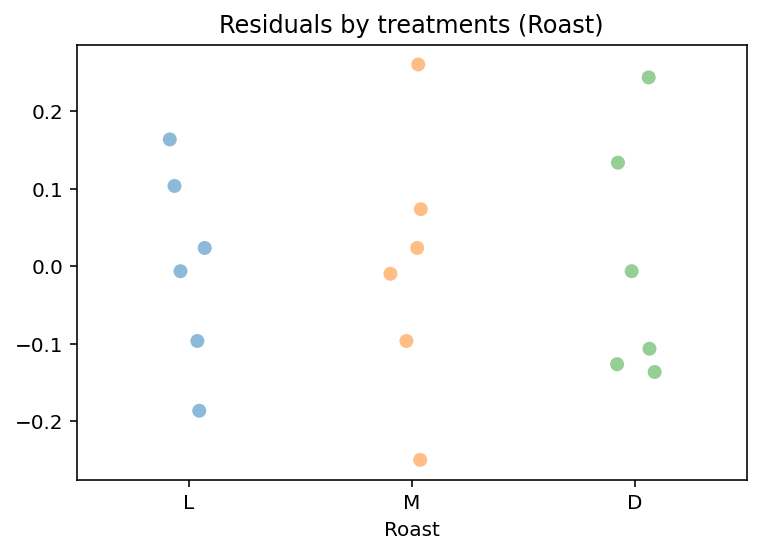

In [24]:
sns. stripplot(x=df['Roast'], y=int_model.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Roast)')
pass;

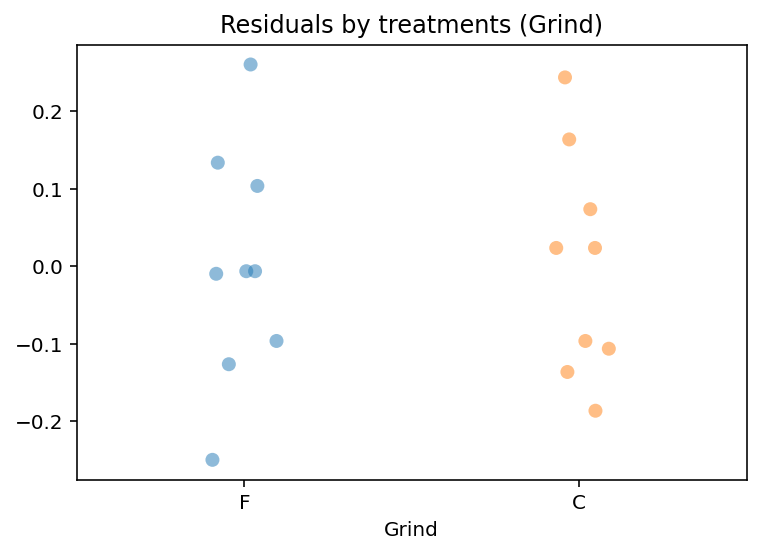

In [25]:
sns. stripplot(x=df['Grind'], y=int_model.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Grind)')
pass;

### <font color=#2093c3>From the graph, the residuals plot is in random pattern. So we can assume that the variances are the same in each treatment. Thus, the constant variance assumption is satisfied.</font> 

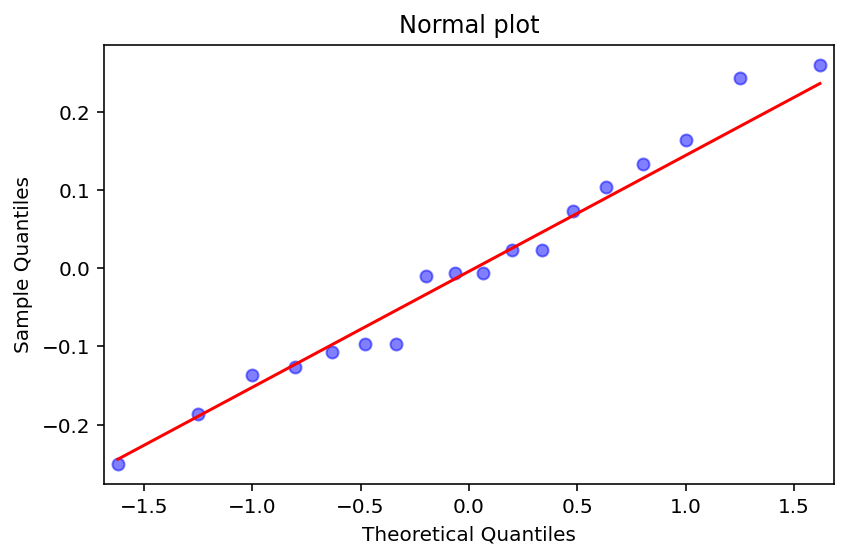

In [26]:
sm.graphics.qqplot(int_model.resid,line='q',alpha=0.5,ms=6)
plt.title('Normal plot')
plt.tight_layout()
pass;

### <font color=#2093c3>From the graph, we can see that data are fall along the straight line. Hence, it satisfies our normality assumption.</font> 

## Residual

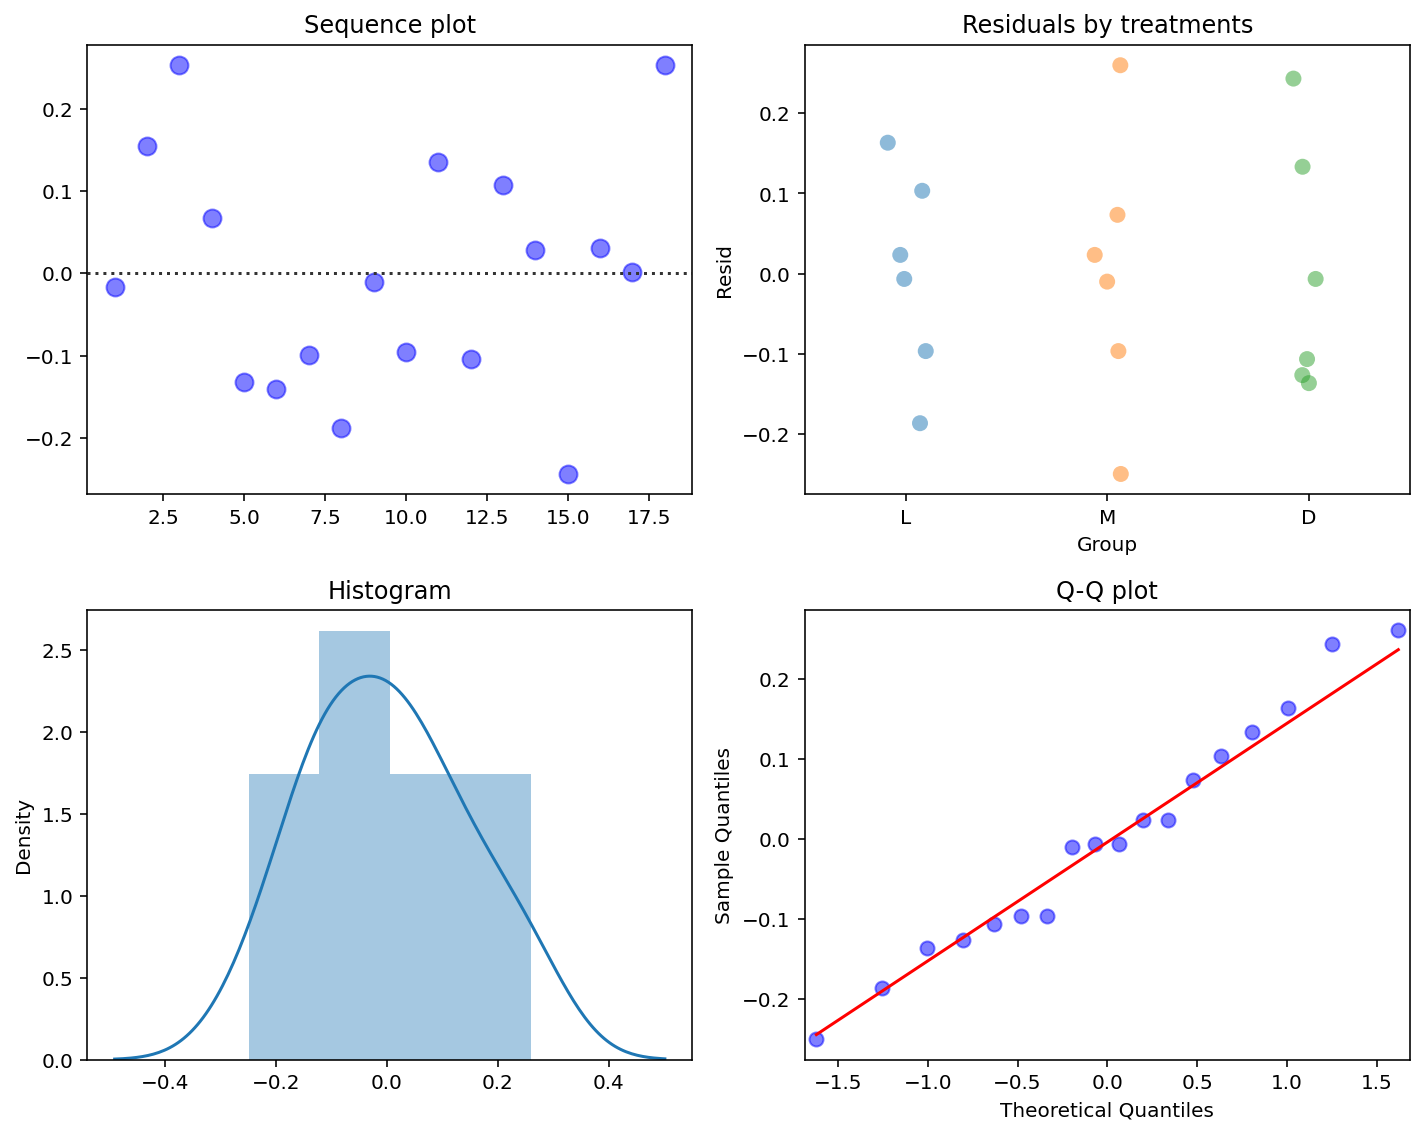

In [27]:
check_anova_normality(df['Roast'], int_model.resid)

## Interaction

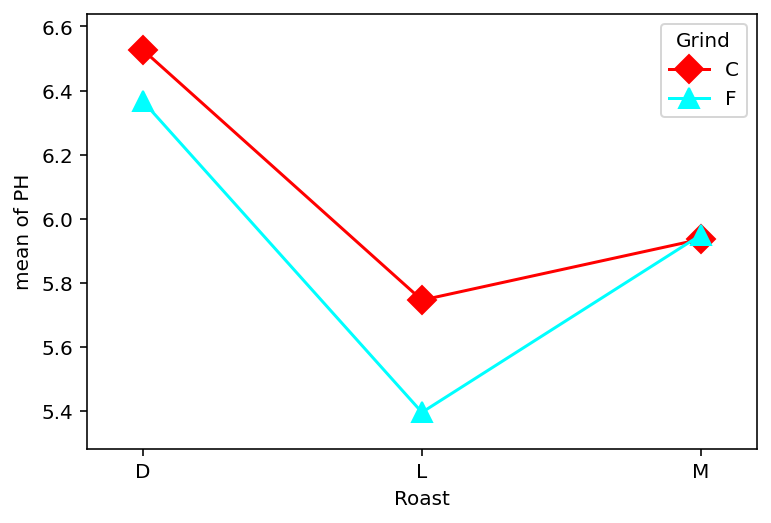

In [30]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(df.Roast, 
                       df.Grind, 
                       df.PH, 
                       markers=['D','^'], ms=10) 

## Consumption
### From the problem, which is significant to pH of coffee.
### <font color=#2093c3>There are many kinds of coffe today. We perform this experiment to find out which is significant to pH of coffee. There are 3 Factors to be considered in this experiment. The first factor is the size of coffee grind. From the experiment and analysis, we can see that size of coffee grind doesn't have a significant effect to the pH of coffee. For the second factor which is type of coffee roast. This factor has the significant effect to the response. From the analysis, we can see that, different types of roast clearly give different value of pH. We also considered the effect of the interaction between each factor. From the result, the interaction between grind and roast which is not significant to effect.</font> 